In [ ]:

import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
books = pd.read_csv('guardian.csv')

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30059 entries, 0 to 30058
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           29111 non-null  object
 1   Intro Text      29977 non-null  object
 2   Authors         25489 non-null  object
 3   Article Text    29691 non-null  object
 4   Date Published  27618 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [ ]:
books[['Title', 'Intro Text', 'Authors', 'Article Text', 'Date Published']] = books[['Title', 'Intro Text', 'Authors', 'Article Text', 'Date Published']].astype( str )

In [ ]:
books.head()

,Title,Intro Text,Authors,Article Text,Date Published
0,Liz Truss ‘will approve more oil drilling if ...,Tory leadership candidate criticised by campai...,"['Rob Davies', '@ByRobDavies']",Liz Truss will sign off on a push for more oil...,2022-08-30
1,Renewed Highland golf course plan has environm...,Scottish government rejected a new links at Co...,"['Ewan Murray', '@mrewanmurray']",It is an area so tranquil that the notion of b...,2021-03-22
2,Visiting green spaces deters mental health dr...,Positive effects were stronger among those rep...,"['Damien Gayle', '@damiengayle']","Visits to parks, community gardens and other u...",2023-01-17
3,Bought too much red cabbage? Turn it into a fe...,This fantastic vegan centrepiece makes full us...,['Tom Hunt'],"I devised today’s nut roast for Oddbox, a veg ...",2023-12-22
4,‘This year has been very good’: readers’ UK bu...,Readers share their favourite sightings over t...,['Guardian readers'],‘Constant companions to our gardening’A peacoc...,2023-12-19


In [ ]:
books.head()

,Title,Intro Text,Authors,Article Text,Date Published
0,Liz Truss ‘will approve more oil drilling if ...,Tory leadership candidate criticised by campai...,"['Rob Davies', '@ByRobDavies']",Liz Truss will sign off on a push for more oil...,2022-08-30
1,Renewed Highland golf course plan has environm...,Scottish government rejected a new links at Co...,"['Ewan Murray', '@mrewanmurray']",It is an area so tranquil that the notion of b...,2021-03-22
2,Visiting green spaces deters mental health dr...,Positive effects were stronger among those rep...,"['Damien Gayle', '@damiengayle']","Visits to parks, community gardens and other u...",2023-01-17
3,Bought too much red cabbage? Turn it into a fe...,This fantastic vegan centrepiece makes full us...,['Tom Hunt'],"I devised today’s nut roast for Oddbox, a veg ...",2023-12-22
4,‘This year has been very good’: readers’ UK bu...,Readers share their favourite sightings over t...,['Guardian readers'],‘Constant companions to our gardening’A peacoc...,2023-12-19


In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(book):
    blob = TextBlob(book)
    return blob.sentiment.polarity

In [ ]:

books['Intro Text'] = books['Intro Text'].apply(get_sentiment)
#результат плавабщее значение от -1 до 1 где 1 позитив

In [ ]:
books.head()

,Title,Intro Text,Authors,Article Text,Date Published
0,Liz Truss ‘will approve more oil drilling if ...,0.318182,"['Rob Davies', '@ByRobDavies']",Liz Truss will sign off on a push for more oil...,2022-08-30
1,Renewed Highland golf course plan has environm...,-0.081818,"['Ewan Murray', '@mrewanmurray']",It is an area so tranquil that the notion of b...,2021-03-22
2,Visiting green spaces deters mental health dr...,0.227273,"['Damien Gayle', '@damiengayle']","Visits to parks, community gardens and other u...",2023-01-17
3,Bought too much red cabbage? Turn it into a fe...,0.375000,['Tom Hunt'],"I devised today’s nut roast for Oddbox, a veg ...",2023-12-22
4,‘This year has been very good’: readers’ UK bu...,0.000000,['Guardian readers'],‘Constant companions to our gardening’A peacoc...,2023-12-19


In [ ]:
# Определение функции для присвоения метки настроения на основе оценки полярности настроения
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'negative'

In [ ]:
# Применение функции к столбцу 'sentiment' датасета для присвоения меток настроения
books['Intro Text'] = books['Intro Text'].apply(get_sentiment_label)

In [ ]:
books.head()

,Title,Intro Text,Authors,Article Text,Date Published
0,Liz Truss ‘will approve more oil drilling if ...,positive,"['Rob Davies', '@ByRobDavies']",Liz Truss will sign off on a push for more oil...,2022-08-30
1,Renewed Highland golf course plan has environm...,negative,"['Ewan Murray', '@mrewanmurray']",It is an area so tranquil that the notion of b...,2021-03-22
2,Visiting green spaces deters mental health dr...,positive,"['Damien Gayle', '@damiengayle']","Visits to parks, community gardens and other u...",2023-01-17
3,Bought too much red cabbage? Turn it into a fe...,positive,['Tom Hunt'],"I devised today’s nut roast for Oddbox, a veg ...",2023-12-22
4,‘This year has been very good’: readers’ UK bu...,negative,['Guardian readers'],‘Constant companions to our gardening’A peacoc...,2023-12-19


In [ ]:
# Замена 'neg' на 0 и 'pos' на 1
books['Intro Text'] = books['Intro Text'].replace({'negative': 0, 'positive': 1})

In [ ]:
books.head()

,Title,Intro Text,Authors,Article Text,Date Published
0,Liz Truss ‘will approve more oil drilling if ...,1,"['Rob Davies', '@ByRobDavies']",Liz Truss will sign off on a push for more oil...,2022-08-30
1,Renewed Highland golf course plan has environm...,0,"['Ewan Murray', '@mrewanmurray']",It is an area so tranquil that the notion of b...,2021-03-22
2,Visiting green spaces deters mental health dr...,1,"['Damien Gayle', '@damiengayle']","Visits to parks, community gardens and other u...",2023-01-17
3,Bought too much red cabbage? Turn it into a fe...,1,['Tom Hunt'],"I devised today’s nut roast for Oddbox, a veg ...",2023-12-22
4,‘This year has been very good’: readers’ UK bu...,0,['Guardian readers'],‘Constant companions to our gardening’A peacoc...,2023-12-19


<Axes: >

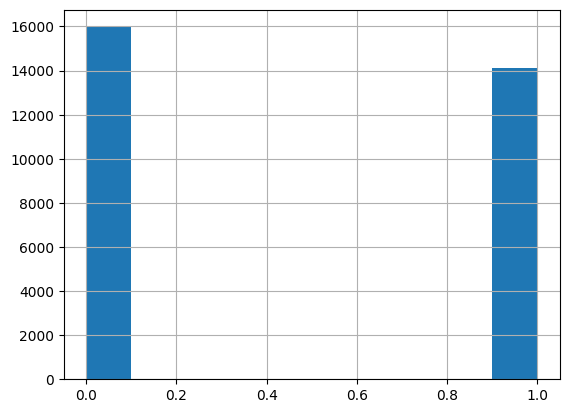

In [ ]:
books['Intro Text'].hist()

In [ ]:
# Перемешивание данных
reviews = shuffle(books)

In [ ]:
# Разделение датасета на размеченную и неразмеченную выборки
labeled_books, unlabeled_books = train_test_split(books, train_size=0.2, random_state=62)

In [ ]:
#тестовая выборка 20%
labeled_books.head()

,Title,Intro Text,Authors,Article Text,Date Published
17016,New Zealand suspends live cattle exports afte...,1,"['Supported by', 'About this content', 'Sophie...",New Zealand has suspended live cattle exports ...,2020-09-23
3686,nan,1,nan,The traditional owners of Darwin say a “pricel...,2023-05-22
3601,Liechtenstein prince accused of shooting Roma...,0,"['The age of extinction is supported by', 'Abo...",Environmental groups have accused a prince fro...,2018-09-12
10853,Rare sea turtle swept across Atlantic to Welsh...,0,"['Steven Morris', '@stevenmorris20']","Her arrival, washed up on a wintery Welsh beac...",nan
6175,UK cities need to prepare for future wildfire...,1,"['Jamie Grierson', '@JamieGrierson']",Fire chiefs have warned that cities in the UK ...,2022-07-27


In [ ]:
unlabeled_books.head()

,Title,Intro Text,Authors,Article Text,Date Published
14719,This article is more than 9 months oldNumber ...,0,"['Supported by', 'About this content', 'Fiona ...",The number of people lacking access to safe dr...,2023-03-22
17983,Save millions of lives by tackling climate ch...,1,"['Damian Carrington', ' in Katowice', '@dpcar...",Tackling climate change would save at least a ...,2019-02-09
7884,Tor de force: how to enjoy the brooding beauty...,0,['Chris Moss'],William Crossing wrote more than 15 books abou...,2021-04-03
19483,Grouse moors owners threatened government wit...,1,"['Rob Evans', '@robevansgdn']",Owners of large grouse moors threatened to tak...,2020-02-20
24794,Ex-minister: Bolsonaro ‘most detested’ leader...,0,"['Tom Phillips', ' Latin America correspondent']",Jair Bolsonaro’s neglect of the Amazon has mad...,2019-08-25


In [ ]:
labeled_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6011 entries, 17016 to 9746
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           6011 non-null   object
 1   Intro Text      6011 non-null   int64 
 2   Authors         6011 non-null   object
 3   Article Text    6011 non-null   object
 4   Date Published  6011 non-null   object
dtypes: int64(1), object(4)
memory usage: 410.8+ KB


In [ ]:
books[['Intro Text']] = books[['Intro Text']].astype( str )

In [ ]:
books['Article Text'] = books['Article Text'].astype(str)

In [ ]:
def get_article_mood(article):
    blob = TextBlob(article)
    return blob.sentiment.polarity

In [ ]:
books['mood'] = books['Article Text'].apply(get_article_mood)

In [ ]:
books.head()

,Title,Intro Text,Authors,Article Text,Date Published,mood
0,Liz Truss ‘will approve more oil drilling if ...,1,"['Rob Davies', '@ByRobDavies']",Liz Truss will sign off on a push for more oil...,2022-08-30,0.049185
1,Renewed Highland golf course plan has environm...,0,"['Ewan Murray', '@mrewanmurray']",It is an area so tranquil that the notion of b...,2021-03-22,0.113043
2,Visiting green spaces deters mental health dr...,1,"['Damien Gayle', '@damiengayle']","Visits to parks, community gardens and other u...",2023-01-17,-0.035654
3,Bought too much red cabbage? Turn it into a fe...,1,['Tom Hunt'],"I devised today’s nut roast for Oddbox, a veg ...",2023-12-22,0.145361
4,‘This year has been very good’: readers’ UK bu...,0,['Guardian readers'],‘Constant companions to our gardening’A peacoc...,2023-12-19,0.157409


In [ ]:
def get_evaluation(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
books['sentiment'] = books['mood'].apply(get_evaluation)

In [ ]:
books.head()

,Title,Intro Text,Authors,Article Text,Date Published,mood,sentiment
0,Liz Truss ‘will approve more oil drilling if ...,1,"['Rob Davies', '@ByRobDavies']",Liz Truss will sign off on a push for more oil...,2022-08-30,0.049185,positive
1,Renewed Highland golf course plan has environm...,0,"['Ewan Murray', '@mrewanmurray']",It is an area so tranquil that the notion of b...,2021-03-22,0.113043,positive
2,Visiting green spaces deters mental health dr...,1,"['Damien Gayle', '@damiengayle']","Visits to parks, community gardens and other u...",2023-01-17,-0.035654,negative
3,Bought too much red cabbage? Turn it into a fe...,1,['Tom Hunt'],"I devised today’s nut roast for Oddbox, a veg ...",2023-12-22,0.145361,positive
4,‘This year has been very good’: readers’ UK bu...,0,['Guardian readers'],‘Constant companions to our gardening’A peacoc...,2023-12-19,0.157409,positive


In [ ]:
# Определение функции для обучения модели логистической регрессии на размеченных данных
def train_model(labeled_books):
    # Векторизация текстовых данных с помощью TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(labeled_books['Article Text'])
    y = labeled_books['Intro Text']

    # Обучение модели логистической регрессии на размеченных данных
    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

In [ ]:
# Обучение начальной модели на небольшом наборе
model, vectorizer = train_model(labeled_books)

In [ ]:
# Использование исходной модели для прогнозирования настроения неразмеченных данных
X_unlabeled = vectorizer.transform(unlabeled_books['Article Text'])
y_unlabeled_predicted = model.predict(X_unlabeled)

In [ ]:
# Вычислить неопределенности или энтропии предсказаний
y_unlabeled_proba = model.predict_proba(X_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [ ]:
# Выбор 100 наиболее неопределенных точек данных для маркировки человеком
labeled_books_new = unlabeled_books.iloc[uncertainty.argsort()[:100]]
unlabeled_books_new = unlabeled_books.iloc[uncertainty.argsort()[100:]]

In [ ]:
labeled_books_new.head()

,Title,Intro Text,Authors,Article Text,Date Published
9180,This article is more than 5 months oldA quart...,1,['Andrew Messenger'],A quarter of Queensland’s energy is now being ...,2023-08-17
5165,This article is more than 6 months oldAustral...,1,['Lisa Cox'],Half of Australians are unaware of the extent ...,2023-06-20
10933,This article is more than 10 months oldAustra...,1,['Lisa Cox'],Australia should prepare for grassfires on a s...,2023-02-22
1620,This article is more than 1 month oldAustrali...,1,['Lisa Cox'],Australia’s populations of threatened and near...,2023-11-30
9323,This article is more than 3 months oldAnthony...,1,"['Katharine Murphy', ' Political editor', '@mu...",Anthony Albanese has signalled he will do more...,2023-09-28


In [ ]:
labeled_books_new.to_csv('tich_books_labeled.csv', index=False)

In [ ]:
unlabeled_books_new.to_csv('test_books_labeled.csv', index=False)

In [ ]:
labeled_books = pd.concat([labeled_books, labeled_books_new])

In [ ]:
model, vectorizer = train_model(labeled_books)

In [ ]:
reviews_test = labeled_books_new

In [ ]:
reviews_test.head()

,Title,Intro Text,Authors,Article Text,Date Published
9180,This article is more than 5 months oldA quart...,1,['Andrew Messenger'],A quarter of Queensland’s energy is now being ...,2023-08-17
5165,This article is more than 6 months oldAustral...,1,['Lisa Cox'],Half of Australians are unaware of the extent ...,2023-06-20
10933,This article is more than 10 months oldAustra...,1,['Lisa Cox'],Australia should prepare for grassfires on a s...,2023-02-22
1620,This article is more than 1 month oldAustrali...,1,['Lisa Cox'],Australia’s populations of threatened and near...,2023-11-30
9323,This article is more than 3 months oldAnthony...,1,"['Katharine Murphy', ' Political editor', '@mu...",Anthony Albanese has signalled he will do more...,2023-09-28


In [ ]:
# Оценка модели на тестовом датасете
X_test = vectorizer.transform(reviews_test['Article Text'])
y_test_predicted = model.predict(X_test)
f1 = f1_score(reviews_test['Intro Text'], y_test_predicted)

print(f1)

0.9735449735449735
